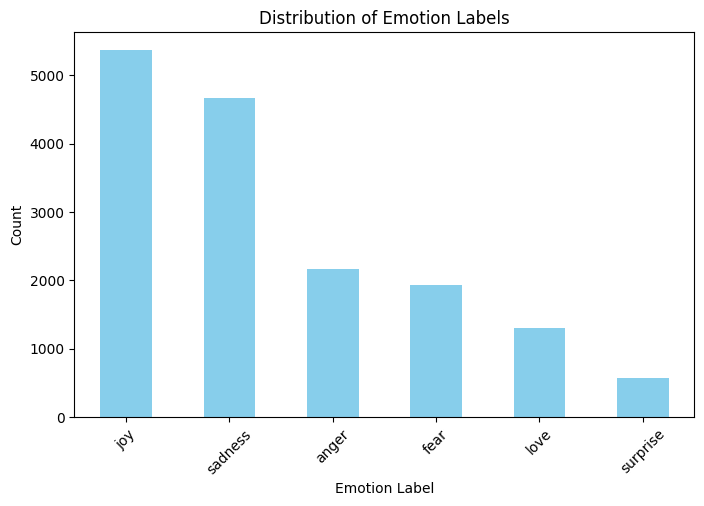

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Assuming 'train.txt' is formatted as 'text;label'
df = pd.read_csv('train.txt', sep=';', header=None, names=['text', 'label'])

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.xticks(rotation=45)
plt.show()


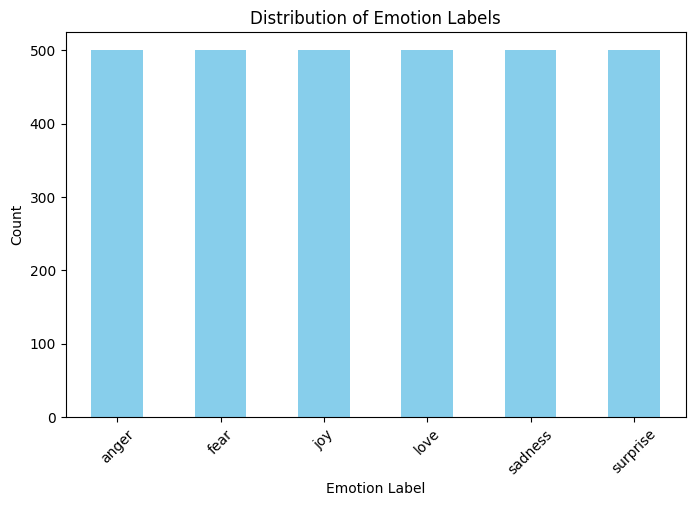

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('sampled_data.csv', header=None, names=['text', 'label'], delimiter=',', quoting=3)

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.xticks(rotation=45)
plt.show()


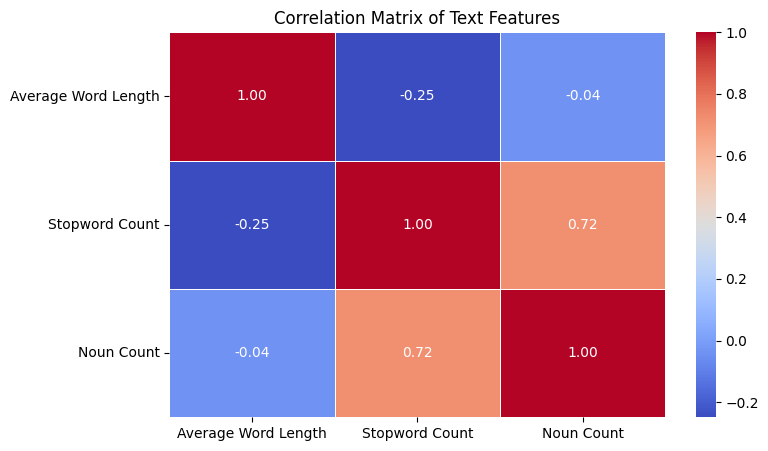

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Load your dataset
df = pd.read_csv('train.txt', sep=';', header=None, names=['text', 'label'])

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to calculate text features
def calculate_text_features_lr_tf(text):
    # Word Count
    word_count = len(text.split())
    # Average Word Length
    words = text.split()
    avg_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0
    # Punctuation Count
    punctuation_count = sum(1 for char in text if char in string.punctuation)
    # Stopword Count
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    # Digit Count
    digit_count = sum(1 for char in text if char.isdigit())
    # POS Tagging
    pos_tags = pos_tag(word_tokenize(text))
    noun_count = sum(1 for word, tag in pos_tags if tag.startswith('NN'))
    # Exclamation Count
    exclamation_count = text.count('!')
    # Question Count
    question_count = text.count('?')
    # Title Word Count
    title_word_count = sum(1 for word in words if word.istitle())
    
    return (avg_word_length, stopword_count, noun_count)

# Apply the feature extraction function
df_features = df['text'].apply(calculate_text_features_lr_tf)
df_features = pd.DataFrame(df_features.tolist(), columns=['Average Word Length', 'Stopword Count', 'Noun Count'])

# Compute the correlation matrix
correlation_matrix = df_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Text Features')
plt.show()
